In [9]:
# 1. Các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('../Datasets/AMD Historical Data.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Open'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3984.070, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3985.415, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3981.718, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3981.834, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3985.766, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3983.571, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3981.994, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3983.183, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3982.420, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.050 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [12]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Open'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Open'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [13]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[84.41961942 84.48689896 84.55150442 84.61629975 84.6810816  84.7458644
 84.81064714 84.87542988 84.94021263 85.00499537 85.06977811 85.13456085
 85.1993436  85.26412634 85.32890908 85.39369182 85.45847457 85.52325731
 85.58804005 85.65282279 85.71760553 85.78238828 85.84717102 85.91195376
 85.9767365  86.04151925 86.10630199 86.17108473 86.23586747 86.30065022]


In [14]:
# 7. Đánh giá độ chính xác validate, test

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_rmse)
print('Validation MAE:', valid_mae)


Testing RMSE: 27.402134975266037
Testing MSE: 750.8770012026981
Testing MAE: 21.8888929445037
Validation RMSE: 15.83228409439459
Validation MSE: 15.83228409439459
Validation MAE: 13.48636372980964


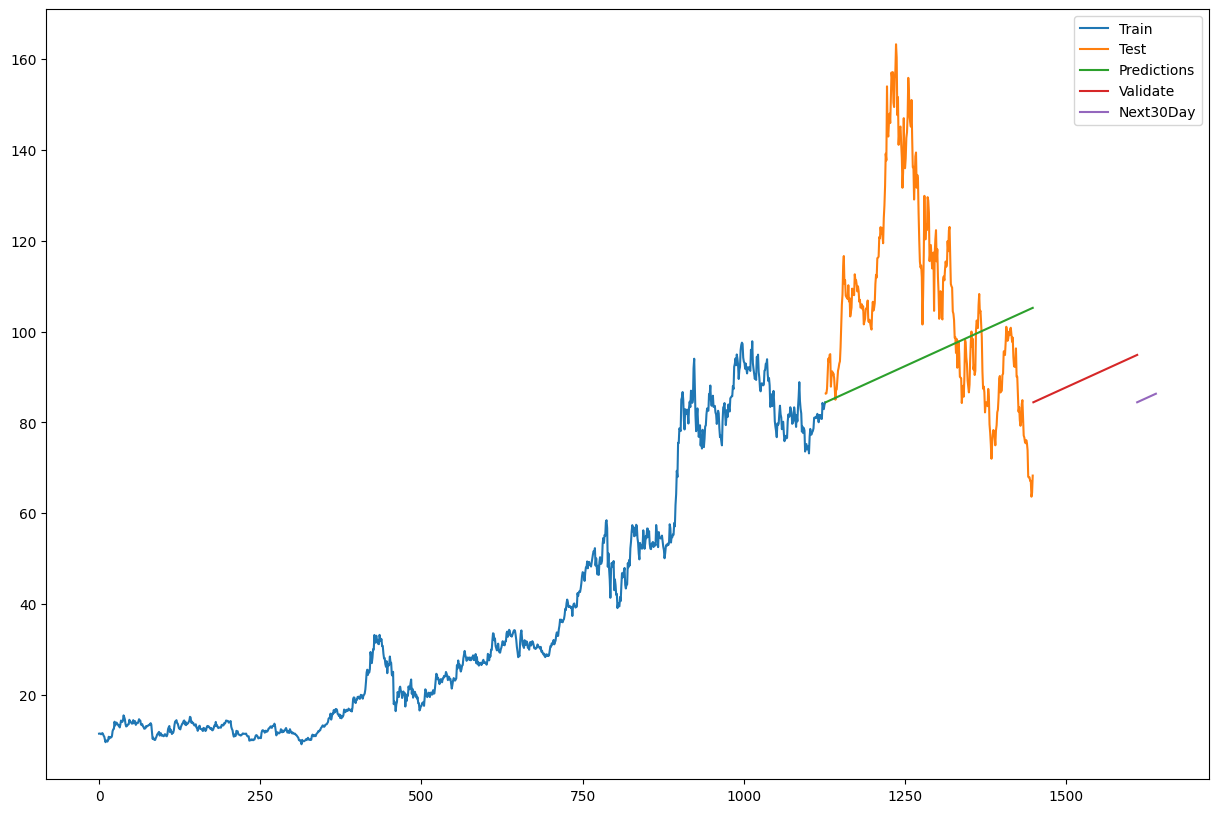

In [18]:
# 9.Vẽ hình
plt.figure(figsize=(15, 10))
plt.plot(train_data.index, train_data['Open'])
plt.plot(test_data.index, test_data['Open'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [16]:
test_data.index

RangeIndex(start=1127, stop=1449, step=1)